In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
encoder=LabelEncoder()
df['Sex']=encoder.fit_transform(df['Sex'].values)
df['BP']=encoder.fit_transform(df['BP'].values)
df['Cholesterol']=encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
86,51,0,2,0,13.597,drugX
4,61,0,1,0,18.043,drugY
99,15,0,0,1,16.725,drugY
157,53,1,1,0,22.963,drugY
47,68,1,1,0,10.291,drugC
138,51,1,0,1,11.343,drugB
76,36,0,0,0,11.198,drugA
22,47,1,1,1,30.568,drugY
161,57,0,0,1,9.945,drugB
17,43,1,0,0,13.972,drugA


In [4]:
X=df.drop('Drug',axis=1).values
Y=df['Drug'].values

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=20)

In [6]:
tree_model=DecisionTreeClassifier()
tree_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [7]:
y_predict=tree_model.predict(X_test)

In [8]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [9]:
print(accuracy_score(Y_test,y_predict))

0.95


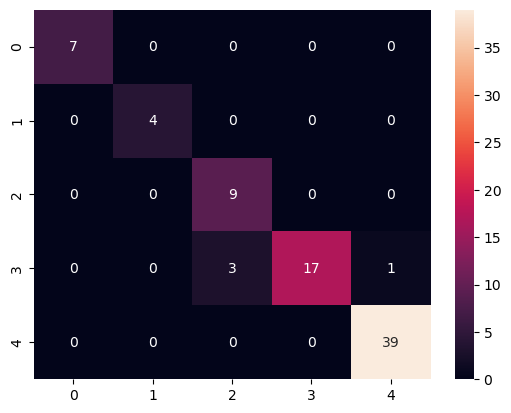

In [10]:
sns.heatmap(confusion_matrix(Y_test,y_predict),annot=True)
plt.show()

In [11]:
predict=cross_val_predict(estimator=tree_model,X=X,y=Y,cv=5)
print(classification_report(Y,predict))

              precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



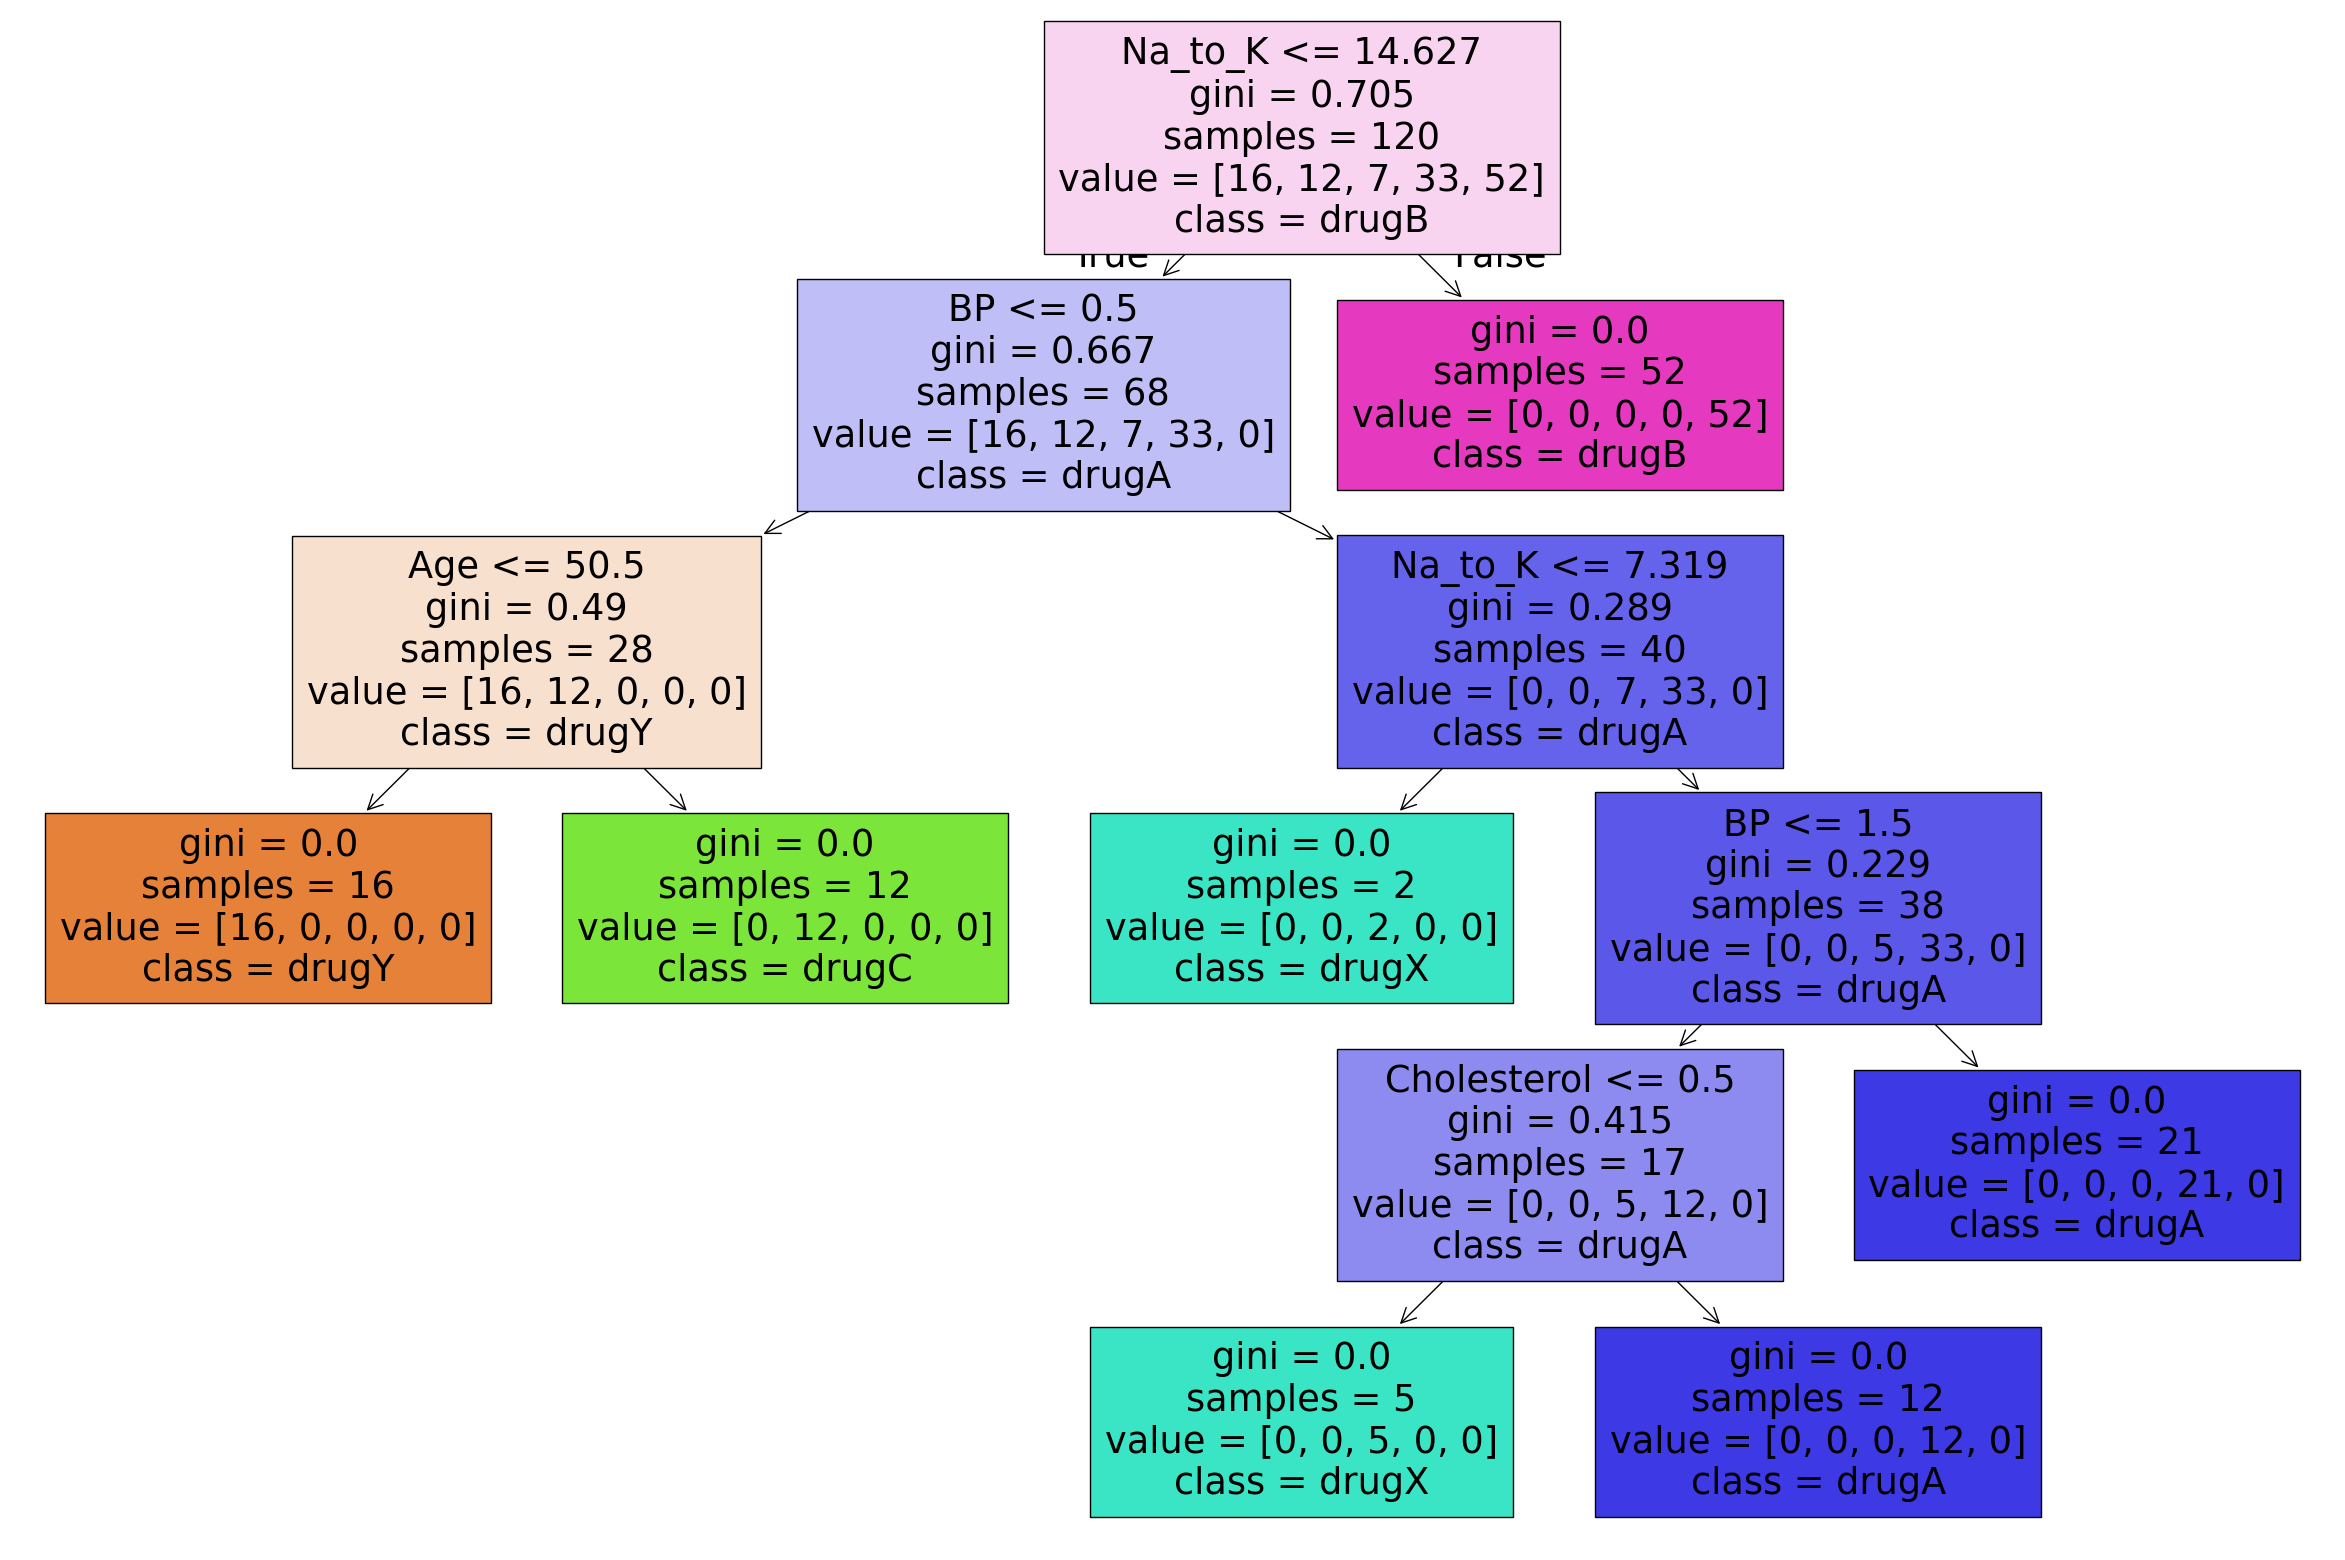

In [12]:
cols=df.drop('Drug',axis=1).columns
classes=df['Drug'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model,feature_names=cols,class_names=classes,filled=True)
plt.show()

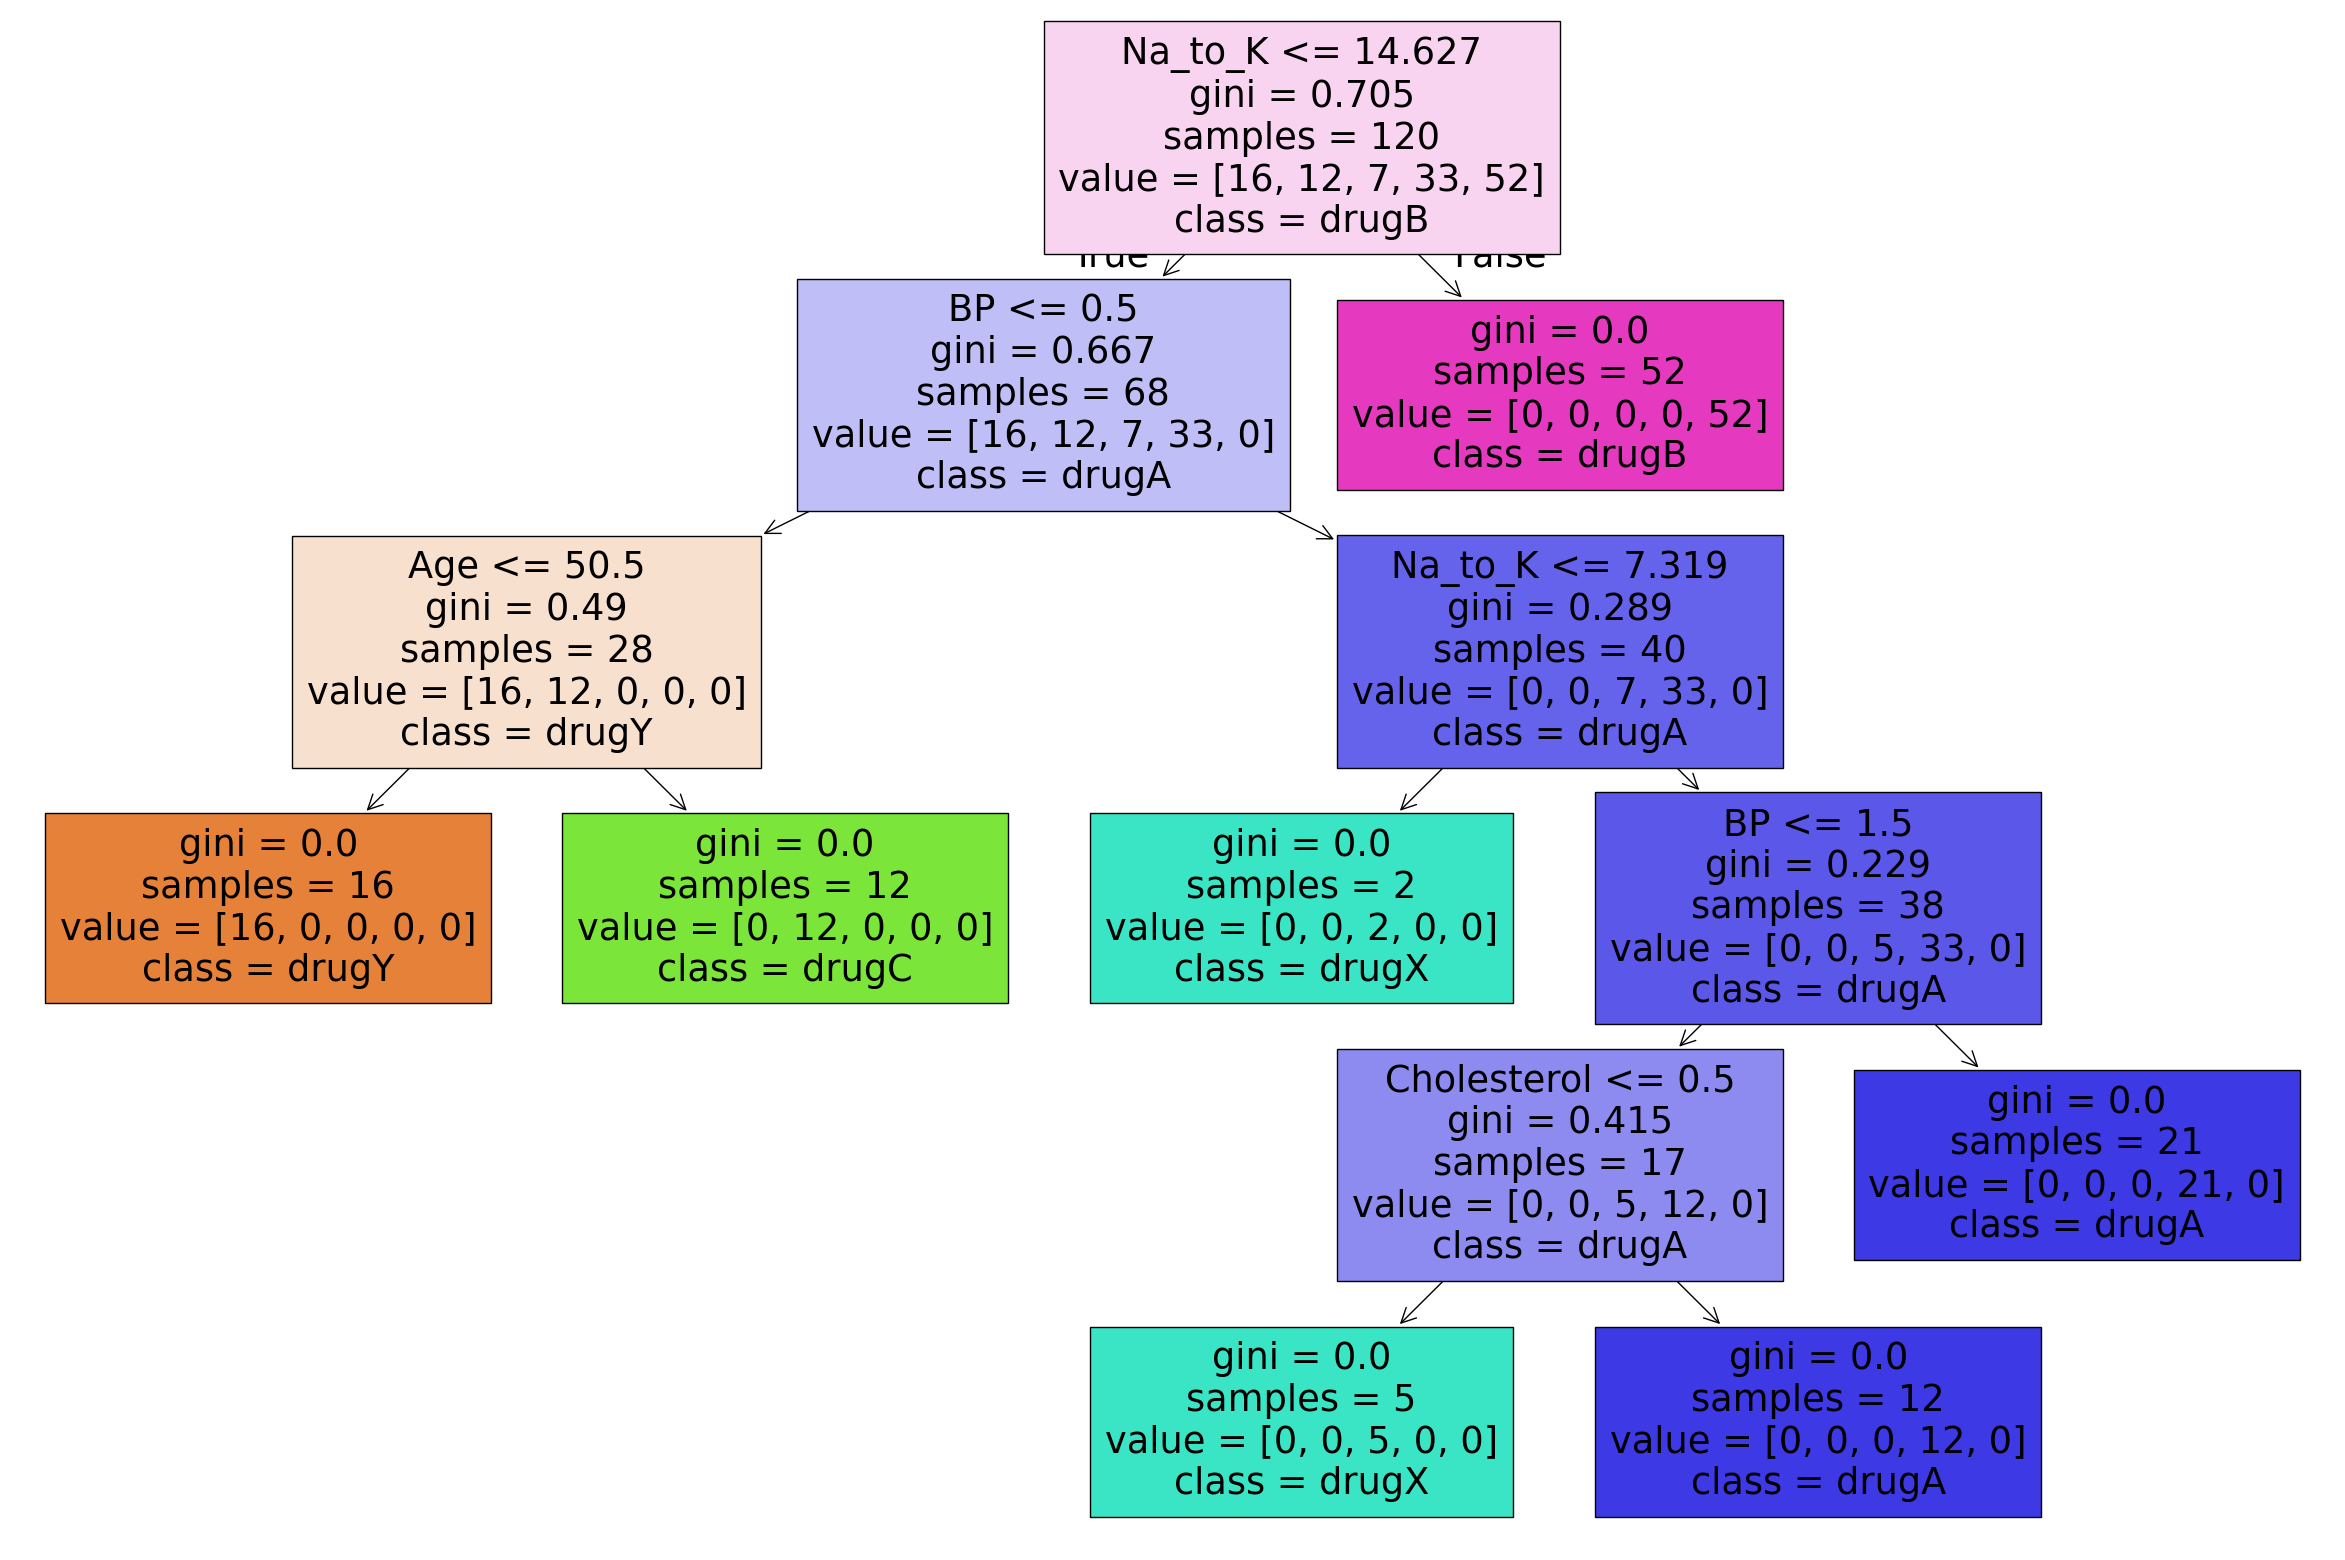

In [13]:
cols=df.drop('Drug',axis=1).columns
classes=df['Drug'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model,feature_names=cols,class_names=classes,filled=True)
plt.show()